<a href="https://colab.research.google.com/github/ashhwiithac22/Deep-Learning-Experiments/blob/main/DL_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload image for addition and subtraction...


Saving download.png to download (3).png
Uploaded files: ['download (3).png']


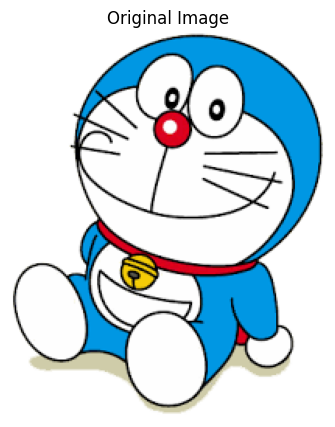

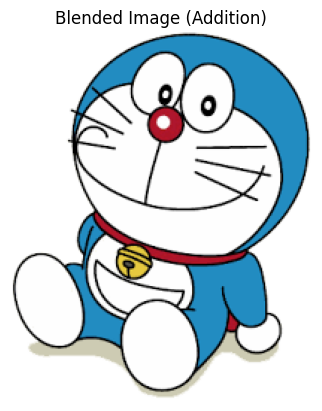

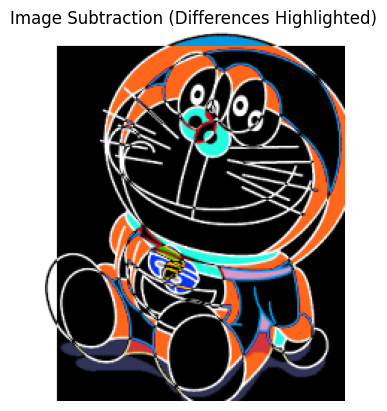

In [ ]:

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Upload image for addition and subtraction...")
uploaded = files.upload()
filenames = list(uploaded.keys())
print("Uploaded files:", filenames)

img1 = cv2.imread(filenames[0])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.figure(figsize=(5,5))
plt.imshow(img1)
plt.title("Original Image")
plt.axis("off")
plt.show()

#image addition -
gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY) #convert the uploaded image to gray scale
gray_3c = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)# Convert grayscale to 3-channel

# Blend grayscale and original image
blended = cv2.addWeighted(img1, 0.7, gray_3c, 0.3, 0)
plt.imshow(blended)
plt.title("Blended Image (Addition)")
plt.axis("off")
plt.show()

#image subtraction is used to detect changes or motion between two images
if len(filenames) > 1:
    img2 = cv2.imread(filenames[1])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    # Resize to match first image if needed
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
else:
    rows, cols = img1.shape[:2]
    M_shift = np.float32([[1, 0, 10], [0, 1, 10]]) #moves the 10 pixels right and 10 pixles down
    img2 = cv2.warpAffine(img1, M_shift, (cols, rows))

diff = cv2.absdiff(img2, img1)
plt.imshow(diff)
plt.title("Image Subtraction (Differences Highlighted)")
plt.axis("off")
plt.show()
